In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# GENERAL
import os, os.path
import sys
import pickle
import numpy

# galpy
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.actionAngle import actionAngleTorus
from galpy.orbit import Orbit
from galpy.df import streamdf
from galpy.util import bovy_plot, bovy_conversion, bovy_coords

# plotting
import seaborn as sns
from matplotlib import cm

%pylab inline

# PROJECT-SPECIFIC
sys.path.insert(0, '../')
from src import MWPotential2014Likelihood
from src import pal5_util

_REFR0 = MWPotential2014Likelihood._REFR0
_REFV0 = MWPotential2014Likelihood._REFV0

Populating the interactive namespace from numpy and matplotlib


In [3]:
save_figures= False

# Tests of the track etc. prediction using ``pal5_util.predict_pal5obs``

## The data

In [4]:
pos_radec, rvel_ra= pal5_util.pal5_total_data()

## Some convenience functions

In [24]:
def plot_data_add_labels(color=sns.color_palette()[2]):
    subplot(1,2,1)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$\mathrm{Dec}\,(\mathrm{degree})$')
    plt.xlim(250.,210.)
    plt.ylim(-15.,9.)
    bovy_plot._add_ticks()
    plt.errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
             ls='none',marker='o',color=color)
    subplot(1,2,2)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$')
#     xlim(250.,220.)
#     ylim(-80.,0.)
    bovy_plot._add_ticks()
    errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
             ls='none',marker='o',color=color)
    return None

## The fiducial model

Can we compute the fiducial model?

In [25]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
fid= pal5_util.predict_pal5obs(p_b15,1.,singlec=True,useTM=False)

1.0 0.6738477054492816


In [26]:
trackRADec_trailing= fid[0][0]
trackRADec_leading= fid[1][0]
trackRAVlos_trailing= fid[2][0]
trackRAVlos_leading= fid[3][0]
print(fid[4], fid[5])

[14.7474431] [26.72613914]


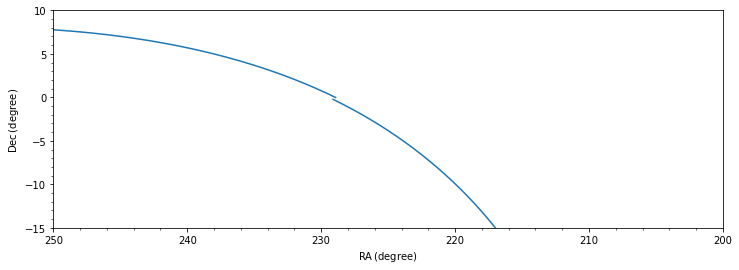

In [29]:
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,200.],
                    yrange=[-15.,10.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.



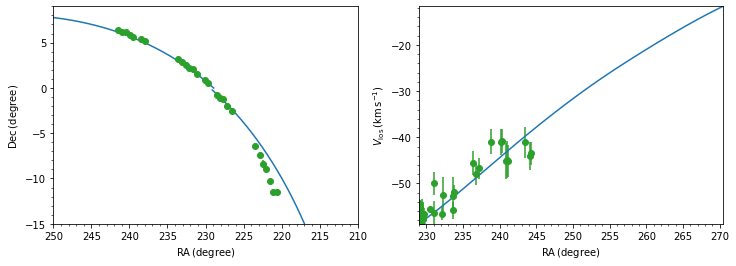

In [30]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
#                     xrange=[250.,220.],
#                     yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
subplot(1,2,2)
bovy_plot.bovy_plot(trackRAVlos_trailing[:,0],
                    trackRAVlos_trailing[:,1],
                    color=sns.color_palette()[0],
#                     xrange=[250.,220.],
#                     yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRAVlos_leading[:,0],
                    trackRAVlos_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot_data_add_labels()

# The case of $c=1.45$ using interpolation and without

In [31]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
c1p5= pal5_util.predict_pal5obs(p_b15,[1.45],interpcs=[1.25,1.55],useTM=False)

1.25 0.6792227065271472
1.55 0.6810128559667996


In [33]:
trackRADec_trailing= c1p5[0][0]
trackRADec_leading= c1p5[1][0]
trackRAVlos_trailing= c1p5[2][0]
trackRAVlos_leading= c1p5[3][0]
print(c1p5[4], c1p5[5])

[21.79523863] [22.46407679]


/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.



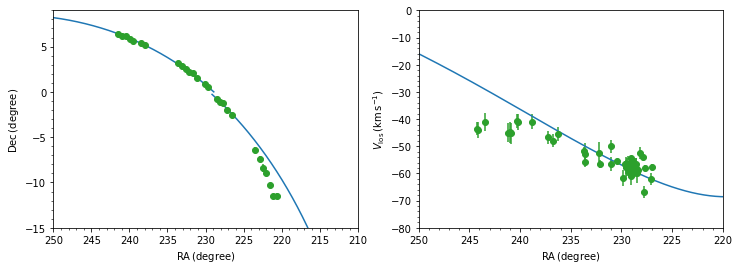

In [34]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
subplot(1,2,2)
bovy_plot.bovy_plot(trackRAVlos_trailing[:,0],
                    trackRAVlos_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRAVlos_leading[:,0],
                    trackRAVlos_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot_data_add_labels()

# Many between two points

In [35]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
cs= numpy.arange(1.25,1.55,0.05)
c1p5= pal5_util.predict_pal5obs(p_b15,cs,interpcs=[1.25,1.55],useTM=False)

1.25 0.6792227065271472
1.55 0.6810128559667996


/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an a

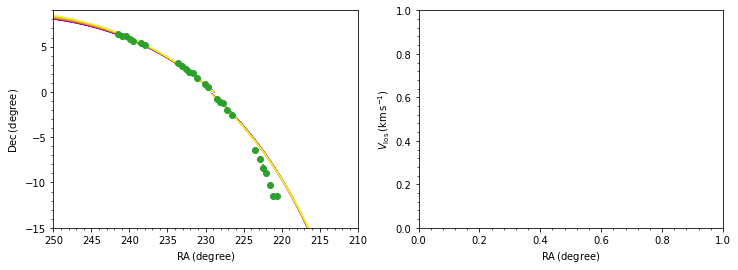

In [36]:
figsize(12,4)
cmap= cm.plasma
for ii, c in enumerate(cs):
    tc= cmap((c-numpy.amin(cs))/(numpy.amax(cs)-numpy.amin(cs)))
    subplot(1,2,1)
    bovy_plot.bovy_plot(c1p5[0][ii,:,0],c1p5[0][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[1][ii,:,0],c1p5[1][ii,:,1],
                        color=tc,overplot=True)
    subplot(1,2,2)
    bovy_plot.bovy_plot(c1p5[2][ii,:,0],c1p5[2][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[3][ii,:,0],c1p5[3][ii,:,1],
                        color=tc,overplot=True)
plot_data_add_labels()

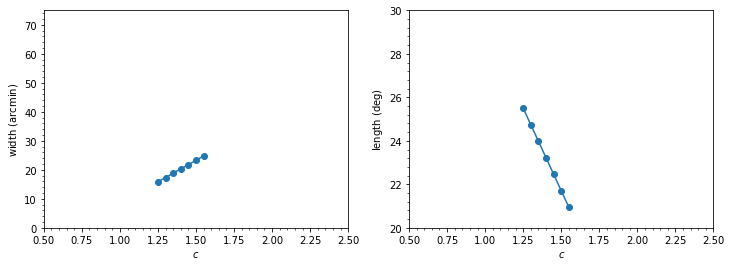

In [37]:
subplot(1,2,1)
bovy_plot.bovy_plot(cs,c1p5[4],'o-',
                    xrange=[0.5,2.5],
                    yrange=[0.,75.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{width}\ (\mathrm{arcmin})$',
                   gcf=True)
subplot(1,2,2)
bovy_plot.bovy_plot(cs,c1p5[5],'o-',
                    xrange=[0.5,2.5],
                    yrange=[20.,30.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{length}\ (\mathrm{deg})$',
                   gcf=True)

# Many between many points

In [38]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
cs= numpy.arange(0.75,2.35,0.1)
c1p5= pal5_util.predict_pal5obs(p_b15,cs,interpcs=[0.75,1.25,1.75,2.25],useTM=False)

0.75 0.6755447959349239
1.25 0.6792227065271472
1.75 0.6832689862534758
2.25 0.6759901272134393


/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.

/home/nstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an a

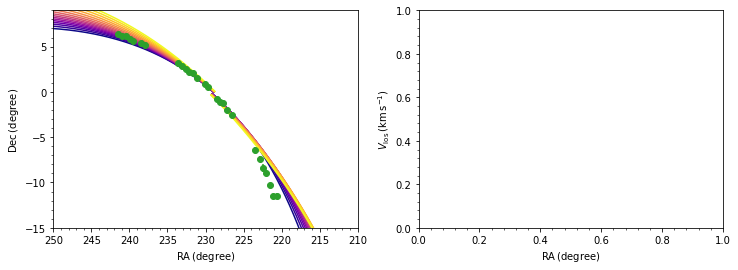

In [39]:
figsize(12,4)
cmap= cm.plasma
for ii, c in enumerate(cs):
    tc= cmap((c-numpy.amin(cs))/(numpy.amax(cs)-numpy.amin(cs)))
    subplot(1,2,1)
    bovy_plot.bovy_plot(c1p5[0][ii,:,0],c1p5[0][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[1][ii,:,0],c1p5[1][ii,:,1],
                        color=tc,overplot=True)
    subplot(1,2,2)
    bovy_plot.bovy_plot(c1p5[2][ii,:,0],c1p5[2][ii,:,1],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(c1p5[3][ii,:,0],c1p5[3][ii,:,1],
                        color=tc,overplot=True)
plot_data_add_labels()

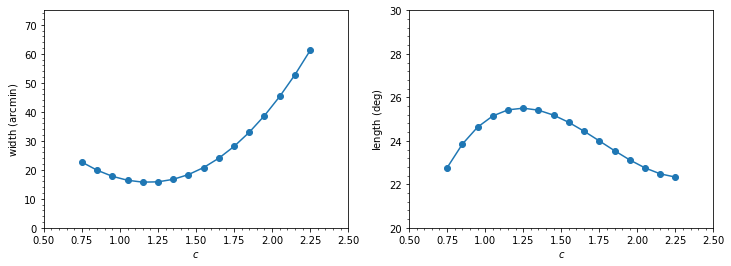

In [40]:
subplot(1,2,1)
bovy_plot.bovy_plot(cs,c1p5[4],'o-',
                    xrange=[0.5,2.5],
                    yrange=[0.,75.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{width}\ (\mathrm{arcmin})$',
                   gcf=True)
subplot(1,2,2)
bovy_plot.bovy_plot(cs,c1p5[5],'o-',
                    xrange=[0.5,2.5],
                    yrange=[20.,30.],
                    xlabel=r'$c$',
                    ylabel=r'$\mathrm{length}\ (\mathrm{deg})$',
                   gcf=True)

These latter trends aren't quite correct (both should probably have their extremum near $c=1$), but that's because the interpolation grid isn't good enough. The method works though.